In [20]:
import sys
import numpy as np
import matplotlib.pyplot as plt
dir='out_KTM-2D/'
from matplotlib.patches import Polygon
import pandas as pd
import pyproj
from matplotlib.colors import Normalize
from scipy.interpolate import interp1d
from mpl_toolkits.mplot3d import Axes3D


## Contents of this notebook
1. Loading topography and gorkha data
2. Extracting topography at multiple cross sections
3. Writing topography files 

#### 1. Loading topography

In [3]:
topofile='N27E085.SRTMGL1.hgt/N27E085.SRTMGL1.hgt'



def read_hgt_file(file_path):
    with open(file_path, 'rb') as file:
        # Read 16-bit signed integers (big-endian) from the file
        elevations = np.fromfile(file, np.dtype('>i2'), -1)
    return elevations

def parse_hgt_file(file_path):
    # The HGT file covers 1 degree of latitude and longitude
    data_size = 3601  # SRTM1 size (30m resolution)

    # Load the HGT file and reshape it into a 2D numpy array
    elevations = read_hgt_file(file_path).reshape((data_size, data_size))

    # Calculate latitude and longitude intervals
    lat_interval = 1.0 / (data_size - 1)
    lon_interval = 1.0 / (data_size - 1)

    # Create arrays for latitude and longitude values
    latitudes = np.linspace(27.0, 28.0, data_size)
    longitudes = np.linspace(85.0, 86.0, data_size)

    return elevations, latitudes, longitudes
    r

# Replace 'path/to/your/hgt_file.hgt' with the actual path to your HGT file
hgt_file_path = 'N27E085.SRTMGL1.hgt/N27E085.hgt'
elevations, latitudes, longitudes = parse_hgt_file(hgt_file_path)


In [4]:
def lat_lon_to_utm(latitude, longitude):
    utm_proj = pyproj.Proj(proj='utm', zone=45, ellps='WGS84')
    utm_easting, utm_northing = utm_proj(longitude, latitude)
    return utm_easting, utm_northing


utm_easting, utm_northing = lat_lon_to_utm(latitudes, longitudes)

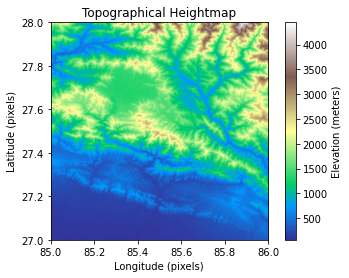

In [5]:

def plot_heightmap(heightmap):
    plt.imshow(np.flipud(heightmap), extent=[longitudes[0], longitudes[-1], latitudes[0], latitudes[-1]],cmap='terrain', origin='lower')
    plt.colorbar(label='Elevation (meters)')
    plt.xlabel('Longitude (pixels)')
    plt.ylabel('Latitude (pixels)')
    plt.title('Topographical Heightmap')
    plt.show()

# Plot the heightmap
plot_heightmap(elevations)


In [7]:
gorkha=['2015_gorkhadata/40623_2016_383_MOESM1_ESM.dat','2015_gorkhadata/40623_2016_383_MOESM2_ESM.dat','2015_gorkhadata/40623_2016_383_MOESM3_ESM.dat','2015_gorkhadata/40623_2016_383_MOESM4_ESM.dat',]
ktp=[]
tvu=[]
ptn=[]
thm=[]
# Open the file in read mode
with open(gorkha[3], 'r') as file:
    # Read the entire content of the file
     for line in file:
        # Assuming the data is comma-separated, you can split the line based on the comma
        # If it's tab-separated, use '\t' instead of ','
        row_data = line.strip().split('\t')
        thm.append(row_data)
        
with open(gorkha[2], 'r') as file:
    # Read the entire content of the file
     for line in file:
        # Assuming the data is comma-separated, you can split the line based on the comma
        # If it's tab-separated, use '\t' instead of ','
        row_data = line.strip().split('\t')
        ptn.append(row_data)
        
with open(gorkha[1], 'r') as file:
    # Read the entire content of the file
     for line in file:
        # Assuming the data is comma-separated, you can split the line based on the comma
        # If it's tab-separated, use '\t' instead of ','
        row_data = line.strip().split('\t')
        tvu.append(row_data)

with open(gorkha[0], 'r') as file:
    # Read the entire content of the file
     for line in file:
        # Assuming the data is comma-separated, you can split the line based on the comma
        # If it's tab-separated, use '\t' instead of ','
        row_data = line.strip().split('\t')
        ktp.append(row_data)

# Now 'file_content' holds the contents of the file as a single string
print(thm[24][0][22:])
print(thm[25][0][22:])
print(ktp[24][0][22:])
print(ktp[25][0][22:])
print(tvu[24][0][22:])
print(tvu[25][0][22:])
print(ptn[24][0][22:])
print(ptn[25][0][22:])

N27.68130
E85.37705
N27.68216
E85.27259
N27.68179
E85.28825
N27.68150
E85.31896


In [9]:
def convert_to_utm(latitude, longitude):
    # Define the UTM zone (45N for Kathmandu, Nepal)
    utm_zone = 45

    # Create a pyproj.Proj object with the WGS84 coordinate system (latitude and longitude)
    wgs84 = pyproj.Proj(proj='latlong', datum='WGS84')

    # Create a pyproj.Proj object with the UTM coordinate system (easting and northing)
    utm = pyproj.Proj(proj='utm', zone=utm_zone, datum='WGS84')

    # Perform the conversion from latitude and longitude to UTM easting and northing
    utm_easting, utm_northing = pyproj.transform(wgs84, utm, longitude, latitude)

    return utm_easting, utm_northing

# Given coordinates (N27.68130, E85.37705) for THM Kathmandu, Nepal
thm_latitude = 27.68130
thm_longitude = 85.37705
ktp_latitude=27.68216
ktp_longitude=85.27259
tvu_latitude=27.68179
tvu_longitude=85.28825
ptn_latitude=27.68150
ptn_longitude=85.31896

thm_utm_easting, thm_utm_northing = convert_to_utm(thm_latitude, thm_longitude)
ktp_utm_easting, ktp_utm_northing = convert_to_utm(ktp_latitude, ktp_longitude)

tvu_utm_easting, tvu_utm_northing = convert_to_utm(tvu_latitude, tvu_longitude)
ptn_utm_easting, ptn_utm_northing = convert_to_utm(ptn_latitude, ptn_longitude)



print(f"UTM Easting: {thm_utm_easting}")
print(f"UTM Northing: {thm_utm_northing}")

UTM Easting: 339948.1980058865
UTM Northing: 3062952.3870210825


<ipython-input-9-e3be4d1e7c41>:12: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  utm_easting, utm_northing = pyproj.transform(wgs84, utm, longitude, latitude)
<ipython-input-9-e3be4d1e7c41>:12: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  utm_easting, utm_northing = pyproj.transform(wgs84, utm, longitude, latitude)
<ipython-input-9-e3be4d1e7c41>:12: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  utm_easting, utm_northing = pyproj.transform(wgs84, utm, longitude, latitude)
<ipython-input-9-e3be4d1e7c41>:12: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  utm_easting, utm_northing = pyproj.transform(w

In [13]:

#######Extracting the topography data at latitude of KTP stations

mask=(utm_northing<ktp_utm_northing+15) & (utm_northing>ktp_utm_northing-15) ##since this is 30m topographic map, there will only be one profile
utm_northing==utm_northing[mask]
profile1_northing_index=np.where(utm_northing==utm_northing[mask])[0][0]
profile1_northing=utm_northing[profile1_northing_index]
profile1_elevations=(elevations)[:,profile1_northing_index]

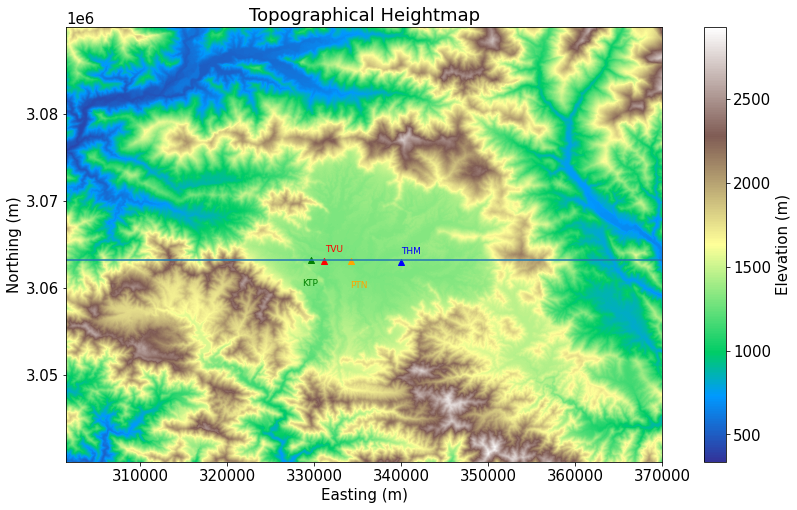

In [156]:
## load gorkha data (present later in this notebook) before running this cell.


# Create lists to hold the latitude and longitude values
latitudes = [thm_latitude, ktp_latitude, tvu_latitude, ptn_latitude]
longitudes = [thm_longitude, ktp_longitude, tvu_longitude, ptn_longitude]

plt.figure(figsize=(15,8))
def plot_heightmap(heightmap):
    plt.imshow(np.flipud(heightmap)[1711:3350,:2455], extent=[utm_easting[0], utm_easting[2455], utm_northing[1711], utm_northing[3350]],cmap='terrain', origin='lower')
    plt.colorbar(label='Elevation (m)')
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    plt.title('Topographical Heightmap')
    plt.axhline(ktp_utm_northing)
    #plt.axhline(profile1_northing)
    # Add text labels around each point
    plt.scatter(thm_utm_easting, thm_utm_northing, color='blue', label='THM',marker='^')
    plt.scatter(ktp_utm_easting, ktp_utm_northing, color='green', label='KTP',marker='^')
    plt.scatter(tvu_utm_easting, tvu_utm_northing, color='red', label='TVU',marker='^')
    plt.scatter(ptn_utm_easting, ptn_utm_northing, color='orange', label='PTN',marker='^')

# Add text labels around each point
    plt.text(thm_utm_easting + 100, thm_utm_northing + 1000, 'THM', fontsize=9, color='blue')
    plt.text(ktp_utm_easting - 1000, ktp_utm_northing - 3000, 'KTP', fontsize=9, color='green')
    plt.text(tvu_utm_easting + 100, tvu_utm_northing + 1000, 'TVU', fontsize=9, color='red')
    plt.text(ptn_utm_easting - 100, ptn_utm_northing - 3000, 'PTN', fontsize=9, color='orange')

# Add labels and title


# Plot the heightmap
plot_heightmap(elevations)

plt.show()

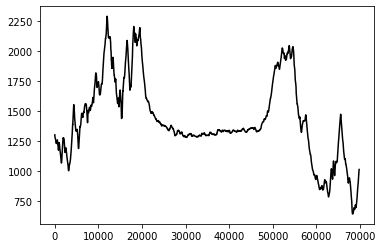

In [15]:
x_shifted_topo=utm_easting[:2505]-np.min(utm_easting[:2505])
y_shifted_topo=np.flipud(elevations)[profile1_northing_index][:2505]

plt.plot(x_shifted_topo,y_shifted_topo,c='black')

In [46]:
#utm_easting[1252]
elevations
profile1_northing_index

2472

In [70]:
elevations

array([[1914, 1916, 1912, ..., 3196, 3180, 3186],
       [1928, 1931, 1929, ..., 3151, 3151, 3171],
       [1945, 1943, 1939, ..., 3112, 3117, 3145],
       ...,
       [  92,   92,   92, ...,  362,  366,  368],
       [  92,   92,   92, ...,  362,  363,  364],
       [  92,   93,   91, ...,  360,  361,  360]], dtype=int16)

#### 2. Extracting topography at multiple cross-sections

In [114]:
################Set INPUT parameters############
################################################

# Define the angle in degrees 

angle_degrees = 30
#angle_degrees = 60
#angle_degrees = 120

# Define the starting point (x, y)

start_x, start_y = 1252, 1128

#################################################

# Define the length of the profile
profile_length = 1500

# Convert angle to radians
angle_radians = np.radians(angle_degrees)

# Calculate the unit vector representing the direction
direction_x = np.cos(angle_radians)
direction_y = np.sin(angle_radians)



# Generate an array of indices along the profile
indices_x = np.arange(start_x- profile_length * direction_x, start_x + profile_length * direction_x, direction_x).astype(int)
indices_y = np.arange(start_y-  profile_length * direction_y, start_y + profile_length * direction_y, direction_y).astype(int)




###########################################
##################UNCOMMENT THE SYNTAX BELOW FOR YOUR PREFERENCE
###########################################



# Clip indices to stay within the array bounds
indices_x1 = np.clip(indices_x, 0, elevations.shape[1] - 1)
indices_y1 = np.clip(indices_y, 0, elevations.shape[0] - 1)
#indices_x2 = np.clip(indices_x, 0, elevations.shape[1] - 1)
#indices_y2 = np.clip(indices_y, 0, elevations.shape[0] - 1)
#indices_x3 = np.clip(indices_x, 0, elevations.shape[1] - 1)
#indices_y3 = np.clip(indices_y, 0, elevations.shape[0] - 1)

# Extract elevations at the specified indices
profile1 = elevations[indices_y1, indices_x1]
#profile2 = elevations[indices_y2, indices_x2]
#profile3 = elevations[indices_y3, indices_x3]



([], [])

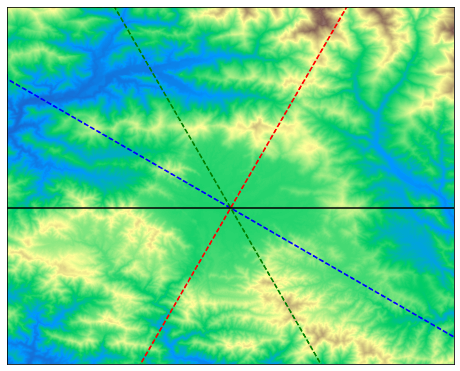

In [124]:
plt.figure(figsize=(8,8))
plt.imshow(elevations,cmap='terrain')

plt.plot(indices_x1,indices_y1,zorder=2,c='blue',linestyle='dashed')
plt.plot(indices_x2,indices_y2,zorder=2,c='green',linestyle='dashed')
plt.plot(indices_x3,indices_y3,zorder=2,c='red',linestyle='dashed')

plt.axhline(3601-profile1_northing_index,c='black',zorder=4)


plt.xlim(0,2500)
plt.ylim(2000,0)
plt.xticks([])
plt.yticks([])

array([2999480.82298571, 2999480.82298571, 2999511.18462403, ...,
       3045056.79890254, 3045056.79890254, 3045087.24633187])

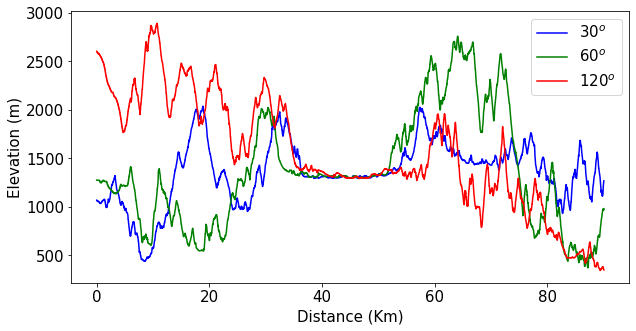

In [146]:
plt.figure(figsize=(10,5))
plt.rc('font',size=15)
plt.plot(np.arange(len(profile1))*30/1000,profile1,c='blue',label=r'$30^o$')
plt.plot(np.arange(len(profile2))*30/1000,profile2,c='green',label=r'$60^o$')

plt.plot(np.arange(len(profile3))*30/1000,profile3,c='red',label=r'$120^o$')

plt.xlabel('Distance (Km)')
plt.ylabel('Elevation (m)')
plt.legend()

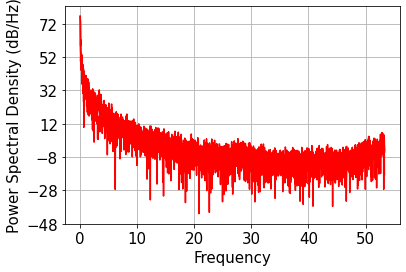

In [136]:
samp=3200/30
psd_t1,freq_t1=plt.psd(profile1,NFFT=len(profile1), Fs=samp, label=r'$\kappa$ = 100m',color='red')
psd_t2,freq_t2=plt.psd(profile2,NFFT=len(profile2), Fs=samp, label=r'$\kappa$ = 100m',color='red')
psd_t3,freq_t3=plt.psd(profile3,NFFT=len(profile3), Fs=samp, label=r'$\kappa$ = 100m',color='red')


Text(0, 0.5, 'PSD ($P_{xx}$)')

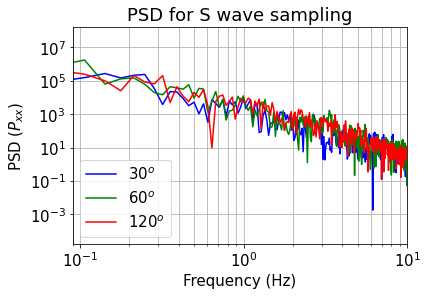

In [231]:

plt.xlim(0.09,10)
plt.plot(freq_t1,psd_t1,  label=r'$30^o$', color='blue')
plt.plot(freq_t2,psd_t2,  label=r'$60^o$', color='green')
plt.plot(freq_t3,psd_t3,  label=r'$120^o$', color='red')
plt.grid(True,which='both',axis='both')

plt.xlim(0.09,10)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title(r'PSD for S wave sampling')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'PSD ($P_{xx}$)')

##### topography back to utm coordinates

In [232]:
plt.figure(figsize=(20,8))
# Plot the heightmap
plot_heightmap(elevations)
plt.plot(utm_easting[indices_x1],utm_northing[len(utm_northing)-1-indices_y1],linestyle='dashed',c='black')
plt.plot(utm_easting[indices_x2],utm_northing[len(utm_northing)-1-indices_y2],linestyle='dashed',c='black')
plt.plot(utm_easting[indices_x3],utm_northing[len(utm_northing)-1-indices_y3],linestyle='dashed',c='black')

In [229]:
tmp1=np.column_stack([indices_x1,indices_y1])
indices1=np.unique(tmp1,axis=0)
tmp2=np.column_stack([indices_x2,indices_y2])
indices2=np.unique(tmp2,axis=0)
tmp3=np.column_stack([indices_x3,indices_y3])
indices3=np.unique(tmp3,axis=0)


In [227]:
mask = np.isin(indices1,tmp1).all(axis=1)


In [230]:
plt.figure(figsize=(20,8))

plot_heightmap(elevations)

plt.plot(utm_easting[indices1[:,0]],utm_northing[len(utm_northing)-1-indices1[:,1]],linestyle='dashed',c='blue')

plt.plot(utm_easting[indices2[:,0]],utm_northing[len(utm_northing)-1-indices2[:,1]],linestyle='dashed',c='green')

plt.plot(utm_easting[indices3[:,0]],utm_northing[len(utm_northing)-1-indices3[:,1]],linestyle='dashed',c='red')
